In [2]:
from concurrent.futures import ThreadPoolExecutor
from config.db_port import get_database
import os
import concurrent
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import mongo_query.datatransformation as datatransformation
import mongo_query.sensor_ids as sensor_ids
from logs import logs_config
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
db = get_database()
sensor = db.load_profile_jdvvnl

In [3]:
df = pd.read_parquet(r"D:\Projects\MongoAPI\sensor_data\d07d36a0-facd-11ed-a890-0242bed38519_data.parquet")
# df = pd.read_parquet(r"D:\Projects\MongoAPI\sensor_data\d077df70-facd-11ed-a890-0242bed38519_data.parquet")
# df = pd.concat([df1,df2])

In [4]:
df

,time,_id,site_id,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_10m,wind_speed_100m,creation_time_iso,creation_time,opening_KWh,prev_KWh,consumed_unit,db_outlier,lag1,lag2,lag3,lag4,lag5,lag6,lag7,day,hour,month,dayofweek,quarter,dayofyear,weekofyear,year,sensor_id
0,2024-01-13 18:30:00,65f3466efd69fcefa3627537,d2d2bf60-facd-11ed-a890-0242bed38519,12.20,53,9.40,0.00,8.00,14.30,2024-01-13T12:30:00,2024-01-13 18:30:00,371167.00,371167.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,18,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
1,2024-01-13 18:45:00,65f3466efd69fcefa3627537,d2d2bf60-facd-11ed-a890-0242bed38519,12.20,53,9.40,0.00,8.00,14.30,2024-01-13T12:30:00,2024-01-13 18:45:00,371167.00,371167.00,0.00,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,13,18,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
2,2024-01-13 19:00:00,65f3466efd69fcefa3627538,d2d2bf60-facd-11ed-a890-0242bed38519,12.60,50,9.90,0.00,6.40,12.90,2024-01-13T13:30:00,2024-01-13 19:00:00,371167.00,371167.00,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,13,19,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
3,2024-01-13 19:15:00,65f3466efd69fcefa3627538,d2d2bf60-facd-11ed-a890-0242bed38519,12.60,50,9.90,0.00,6.40,12.90,2024-01-13T13:30:00,2024-01-13 19:15:00,371167.00,371167.00,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,13,19,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
4,2024-01-13 19:30:00,65f3466efd69fcefa3627538,d2d2bf60-facd-11ed-a890-0242bed38519,12.60,50,9.90,0.00,6.40,12.90,2024-01-13T13:30:00,2024-01-13 19:30:00,371167.00,371167.00,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,13,19,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411856,2024-03-29 22:00:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:00:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac
411857,2024-03-29 22:15:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:15:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.50,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac
411858,2024-03-29 22:30:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:30:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac
411859,2024-03-29 22:45:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:45:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411861 entries, 0 to 411860
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   time                  411861 non-null  datetime64[ns]
 1   _id                   411861 non-null  object        
 2   site_id               411861 non-null  object        
 3   temperature_2m        411861 non-null  float64       
 4   relative_humidity_2m  411861 non-null  int64         
 5   apparent_temperature  411861 non-null  float64       
 6   precipitation         411861 non-null  float64       
 7   wind_speed_10m        411861 non-null  float64       
 8   wind_speed_100m       411861 non-null  float64       
 9   creation_time_iso     411861 non-null  object        
 10  creation_time         411861 non-null  datetime64[ns]
 11  opening_KWh           411861 non-null  float64       
 12  prev_KWh              411861 non-null  float64       
 13 

In [6]:
# df['creation_time'] = pd.to_datetime(df['creation_time'])
df.loc[:, 'creation_time'] = pd.to_datetime(df['creation_time'])

In [7]:
df.loc[:, 'creation_time']

0        2024-01-13 18:30:00
1        2024-01-13 18:45:00
2        2024-01-13 19:00:00
3        2024-01-13 19:15:00
4        2024-01-13 19:30:00
                 ...        
411856   2024-03-29 22:00:00
411857   2024-03-29 22:15:00
411858   2024-03-29 22:30:00
411859   2024-03-29 22:45:00
411860   2024-03-29 23:00:00
Name: creation_time, Length: 411861, dtype: datetime64[ns]

In [11]:
df = df.loc[df.first_valid_index():]
df

,time,_id,site_id,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_10m,wind_speed_100m,creation_time_iso,creation_time,opening_KWh,prev_KWh,consumed_unit,db_outlier,lag1,lag2,lag3,lag4,lag5,lag6,lag7,day,hour,month,dayofweek,quarter,dayofyear,weekofyear,year,sensor_id
0,2024-01-13 18:30:00,65f3466efd69fcefa3627537,d2d2bf60-facd-11ed-a890-0242bed38519,12.20,53,9.40,0.00,8.00,14.30,2024-01-13T12:30:00,2024-01-13 18:30:00,371167.00,371167.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,18,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
1,2024-01-13 18:45:00,65f3466efd69fcefa3627537,d2d2bf60-facd-11ed-a890-0242bed38519,12.20,53,9.40,0.00,8.00,14.30,2024-01-13T12:30:00,2024-01-13 18:45:00,371167.00,371167.00,0.00,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,13,18,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
2,2024-01-13 19:00:00,65f3466efd69fcefa3627538,d2d2bf60-facd-11ed-a890-0242bed38519,12.60,50,9.90,0.00,6.40,12.90,2024-01-13T13:30:00,2024-01-13 19:00:00,371167.00,371167.00,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,13,19,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
3,2024-01-13 19:15:00,65f3466efd69fcefa3627538,d2d2bf60-facd-11ed-a890-0242bed38519,12.60,50,9.90,0.00,6.40,12.90,2024-01-13T13:30:00,2024-01-13 19:15:00,371167.00,371167.00,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,13,19,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
4,2024-01-13 19:30:00,65f3466efd69fcefa3627538,d2d2bf60-facd-11ed-a890-0242bed38519,12.60,50,9.90,0.00,6.40,12.90,2024-01-13T13:30:00,2024-01-13 19:30:00,371167.00,371167.00,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,13,19,1,5,1,13,2,2024,0195d850-651f-47f2-a21f-59e921c6b4ba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411856,2024-03-29 22:00:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:00:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac
411857,2024-03-29 22:15:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:15:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.50,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac
411858,2024-03-29 22:30:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:30:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac
411859,2024-03-29 22:45:00,6615052a0ab2f404d26d9579,d2d55770-facd-11ed-a890-0242bed38519,25.70,25,21.60,0.00,18.90,32.50,2024-03-29T16:30:00,2024-03-29 22:45:00,207872.00,207872.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,22,3,4,1,89,13,2024,ff461253-f417-4f72-98f6-7cac78a3c3ac


In [72]:
df['sensor_id'].nunique()

56

In [73]:
df.loc[df['db_outlier']==-1,"consumed_unit"]=0

<Axes: >

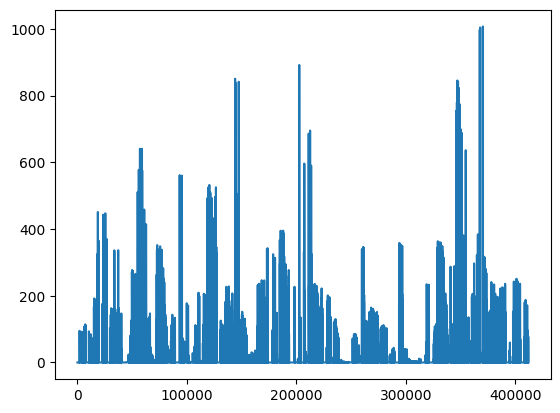

In [5]:
df['consumed_unit'].plot()

In [35]:
a = df[df["sensor_id"]=="ffc9fdfa-b121-4a27-b34a-261b2cc8ae21"]

<Axes: >

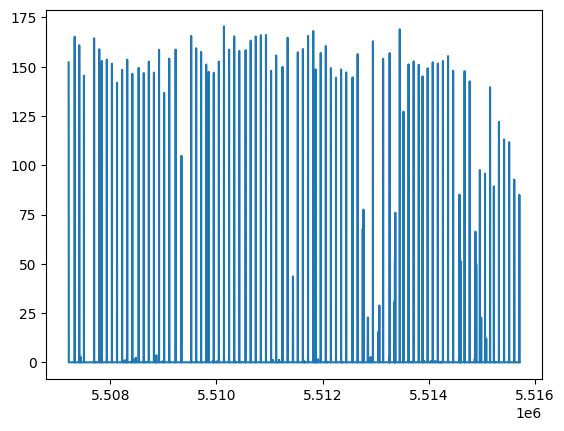

In [36]:
a['consumed_unit'].plot()


In [52]:
a['db_outlier'].unique()

array([ 0,  1, -1,  2], dtype=int64)

In [54]:
a[a["db_outlier"]==-1]

,time,_id,site_id,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_10m,wind_speed_100m,creation_time_iso,opening_KWh,prev_KWh,consumed_unit,db_outlier,lag1,lag2,lag3,lag4,lag5,lag6,lag7,day,hour,month,dayofweek,quarter,dayofyear,weekofyear,year,sensor_id
creation_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-05 10:15:00,2024-01-05 10:15:00,65f34655fd69fcefa35fbb4f,d2cbe190-facd-11ed-a890-0242bed38519,20.30,34,17.10,0.00,12.40,14.20,2024-01-05T04:30:00,37197.30,37012.80,0.00,-1,0.00,0.00,145.40,NaN,NaN,NaN,NaN,5,10,1,4,1,5,1,2024,ffc9fdfa-b121-4a27-b34a-261b2cc8ae21
2024-01-24 09:15:00,2024-01-24 09:15:00,65f34655fd69fcefa35fbd16,d2cbe190-facd-11ed-a890-0242bed38519,21.60,31,20.30,0.00,3.80,4.10,2024-01-24T03:30:00,40103.00,39888.70,0.00,-1,0.00,0.00,0.00,0.00,0.00,NaN,NaN,24,9,1,2,1,24,4,2024,ffc9fdfa-b121-4a27-b34a-261b2cc8ae21


In [43]:
a.set_index(['creation_time'], inplace= True)

In [25]:
a[a['consumed_unit']>1500]

,time,_id,site_id,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_10m,wind_speed_100m,creation_time_iso,opening_KWh,prev_KWh,consumed_unit,db_outlier,lag1,lag2,lag3,lag4,lag5,lag6,lag7,day,hour,month,dayofweek,quarter,dayofyear,weekofyear,year,sensor_id
creation_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-05 05:30:00,2024-01-05 05:30:00,65f3e94225863b5eadca942a,db375670-facd-11ed-a890-0242bed38519,14.80,66,13.20,0.00,8.70,11.50,2024-01-04T23:30:00,941426.90,939166.40,2260.50,2,0.00,0.00,0.00,NaN,NaN,NaN,NaN,5,5,1,4,1,5,1,2024,31291724-6cdb-4571-b264-1e74666d4fc0
2024-01-21 05:00:00,2024-01-21 05:00:00,65f3e94225863b5eadca95aa,db375670-facd-11ed-a890-0242bed38519,17.50,52,16.10,0.00,5.40,7.90,2024-01-20T23:30:00,952388.25,950117.75,2270.50,2,0.00,0.00,0.00,0.00,0.00,NaN,NaN,21,5,1,6,1,21,3,2024,31291724-6cdb-4571-b264-1e74666d4fc0
2024-01-28 05:15:00,2024-01-28 05:15:00,65f3e94225863b5eadca9652,db375670-facd-11ed-a890-0242bed38519,20.10,42,18.30,0.00,6.80,10.40,2024-01-27T23:30:00,957039.94,954774.25,2265.69,2,0.00,0.00,0.00,0.00,0.00,NaN,NaN,28,5,1,6,1,28,4,2024,31291724-6cdb-4571-b264-1e74666d4fc0
2024-01-31 05:00:00,2024-01-31 05:00:00,65f3e94225863b5eadca969a,db375670-facd-11ed-a890-0242bed38519,22.20,49,21.90,0.00,3.90,5.20,2024-01-30T23:30:00,959307.00,957039.94,2267.06,2,0.00,0.00,0.00,635.05,0.00,0.00,NaN,31,5,1,2,1,31,5,2024,31291724-6cdb-4571-b264-1e74666d4fc0


In [44]:
a.loc["2024-01-05 10"]

,time,_id,site_id,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_10m,wind_speed_100m,creation_time_iso,opening_KWh,prev_KWh,consumed_unit,db_outlier,lag1,lag2,lag3,lag4,lag5,lag6,lag7,day,hour,month,dayofweek,quarter,dayofyear,weekofyear,year,sensor_id
creation_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-05 10:00:00,2024-01-05 10:00:00,65f34655fd69fcefa35fbb4f,d2cbe190-facd-11ed-a890-0242bed38519,20.30,34,17.10,0.00,12.40,14.20,2024-01-05T04:30:00,37012.80,37012.80,0.00,1,0.00,0.00,0.00,NaN,NaN,NaN,NaN,5,10,1,4,1,5,1,2024,ffc9fdfa-b121-4a27-b34a-261b2cc8ae21
2024-01-05 10:15:00,2024-01-05 10:15:00,65f34655fd69fcefa35fbb4f,d2cbe190-facd-11ed-a890-0242bed38519,20.30,34,17.10,0.00,12.40,14.20,2024-01-05T04:30:00,37197.30,37012.80,0.00,-1,0.00,0.00,145.40,NaN,NaN,NaN,NaN,5,10,1,4,1,5,1,2024,ffc9fdfa-b121-4a27-b34a-261b2cc8ae21
2024-01-05 10:30:00,2024-01-05 10:30:00,65f34655fd69fcefa35fbb4f,d2cbe190-facd-11ed-a890-0242bed38519,20.30,34,17.10,0.00,12.40,14.20,2024-01-05T04:30:00,37197.30,37197.30,0.00,1,0.00,0.00,0.00,NaN,NaN,NaN,NaN,5,10,1,4,1,5,1,2024,ffc9fdfa-b121-4a27-b34a-261b2cc8ae21
2024-01-05 10:45:00,2024-01-05 10:45:00,65f34655fd69fcefa35fbb4f,d2cbe190-facd-11ed-a890-0242bed38519,20.30,34,17.10,0.00,12.40,14.20,2024-01-05T04:30:00,37197.30,37197.30,0.00,1,0.00,0.00,0.00,NaN,NaN,NaN,NaN,5,10,1,4,1,5,1,2024,ffc9fdfa-b121-4a27-b34a-261b2cc8ae21


In [27]:
df['db_outlier'].unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 13, 12],
      dtype=int64)

In [6]:
sensor_id = "014f8147-ee70-48cb-aa68-ef58e54eaefe"
from_id = sensor_id + "-2024-01-01 00:00:00"
to_id = sensor_id + "-2024-03-31 23:59:59"
query = {"_id": {"$gte": from_id, "$lt": to_id}}

results = list(sensor.find(query))

In [7]:
len(results)

8526

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    8526 non-null   object 
 1   sensor_id              8526 non-null   object 
 2   instant_cum_KW         8526 non-null   float64
 3   instant_R_KW           8503 non-null   float64
 4   instant_Y_KW           8503 non-null   float64
 5   instant_B_KW           8503 non-null   float64
 6   instant_cum_KVA        8526 non-null   float64
 7   instant_R_KVA          8503 non-null   float64
 8   instant_Y_KVA          8503 non-null   float64
 9   instant_B_KVA          8503 non-null   float64
 10  R_Voltage              8526 non-null   float64
 11  Y_Voltage              8526 non-null   float64
 12  B_Voltage              8526 non-null   float64
 13  R_Current              8526 non-null   float64
 14  Y_Current              8526 non-null   float64
 15  B_Cu

In [10]:
df = pd.DataFrame(results)
df

,_id,sensor_id,instant_cum_KW,instant_R_KW,instant_Y_KW,instant_B_KW,instant_cum_KVA,instant_R_KVA,instant_Y_KVA,instant_B_KVA,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,cumm_PF,status,creation_time_ms,date,creation_time,opening_KWh,opening_KVAh,closing_KWh,closing_KVAh,opening_leading_value,opening_lagging_value,closing_leading_value,closing_lagging_value,count,sync,no_p,no_o,no_e
0,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-01-0...,014f8147-ee70-48cb-aa68-ef58e54eaefe,55.72,55.72,0.00,0.00,55.72,0.00,0.00,0.00,60791.00,60735.00,61564.00,3.25,3.15,2.76,8.34,8.59,8.91,8.69,P,1704047400000,2024-01-01,2024-01-01 00:00:00,1504644.00,1595754.00,1504645.00,1595755.00,33.00,509080.00,33.00,509080.00,9,1.00,NaN,NaN,NaN
1,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-01-0...,014f8147-ee70-48cb-aa68-ef58e54eaefe,53.84,53.84,0.00,0.00,53.84,0.00,0.00,0.00,60843.00,60834.00,61611.00,2.63,3.01,2.62,8.30,8.65,8.83,8.59,P,1704048300000,2024-01-01,2024-01-01 00:15:00,1504646.00,1595755.00,1504647.00,1595757.00,33.00,509080.00,33.00,509080.00,9,1.00,NaN,NaN,NaN
2,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-01-0...,014f8147-ee70-48cb-aa68-ef58e54eaefe,52.09,52.09,0.00,0.00,52.09,0.00,0.00,0.00,60911.00,60902.00,61671.00,2.54,2.92,2.53,8.26,8.57,8.81,8.54,P,1704049200000,2024-01-01,2024-01-01 00:30:00,1504647.00,1595757.00,1504647.90,1595758.00,33.00,509080.00,33.00,509081.00,9,1.00,NaN,NaN,NaN
3,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-01-0...,014f8147-ee70-48cb-aa68-ef58e54eaefe,50.66,50.66,0.00,0.00,50.66,0.00,0.00,0.00,61009.00,60963.00,61771.00,2.44,2.84,2.49,8.26,8.52,8.83,8.55,P,1704050100000,2024-01-01,2024-01-01 00:45:00,1504649.00,1595758.00,1504650.00,1595760.00,33.00,509081.00,33.00,509081.00,9,1.00,NaN,NaN,NaN
4,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-01-0...,014f8147-ee70-48cb-aa68-ef58e54eaefe,48.74,32.81,0.00,0.00,48.74,0.00,0.00,0.00,60956.00,60975.00,61738.00,2.33,2.72,2.42,8.21,8.43,8.77,8.46,P,1704051000000,2024-01-01,2024-01-01 01:00:00,1504650.00,1595760.00,1504651.00,1595761.00,33.00,509081.00,33.00,509081.97,9,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-03-3...,014f8147-ee70-48cb-aa68-ef58e54eaefe,156.42,156.42,0.00,0.00,156.42,0.00,0.00,0.00,57818.00,57416.00,57945.00,8.09,8.61,8.07,8.82,8.89,8.91,8.91,P,1711818900000,2024-03-30,2024-03-30 22:45:00,1531896.10,1623870.00,1531900.00,1623874.00,35.00,515304.00,35.00,515305.00,9,1.00,1.00,0.00,0.00
8522,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-03-3...,014f8147-ee70-48cb-aa68-ef58e54eaefe,151.95,151.95,0.00,0.00,151.95,0.00,0.00,0.00,57923.00,57518.00,58059.00,7.85,8.37,7.82,8.79,8.86,8.91,8.83,P,1711819800000,2024-03-30,2024-03-30 23:00:00,1531900.00,1623875.00,1531904.00,1623879.00,35.00,515305.00,35.00,515305.00,9,1.00,1.00,0.00,0.00
8523,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-03-3...,014f8147-ee70-48cb-aa68-ef58e54eaefe,148.29,148.29,0.00,0.00,148.29,0.00,0.00,0.00,58135.00,57726.00,58200.00,7.72,8.03,7.61,8.82,8.90,8.91,8.88,P,1711820700000,2024-03-30,2024-03-30 23:15:00,1531904.00,1623879.00,1531908.00,1623883.00,35.00,515305.00,35.00,515305.97,9,1.00,1.00,0.00,0.00
8524,014f8147-ee70-48cb-aa68-ef58e54eaefe-2024-03-3...,014f8147-ee70-48cb-aa68-ef58e54eaefe,142.04,142.04,0.00,0.00,142.04,0.00,0.00,0.00,58191.00,57809.00,58267.00,7.38,7.69,7.26,8.81,8.90,8.91,8.85,P,1711821600000,2024-03-30,2024-03-30 23:30:00,1531908.00,1623883.00,1531911.90,1623887.00,35.00,515305.97,35.00,515307.00,9,1.00,1.00,0.00,0.00
